# Ford GoBike System Data Exploration
## by Omar Abuhassan

## Dataset Overview

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
color = sb.color_palette()[0]
plt.style.use('fivethirtyeight')
%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('fordgobike-tripdata_cleaned.csv')

In [3]:
# create days categorie type
days = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
ordered_days = pd.api.types.CategoricalDtype(ordered = True, categories = days)

# make day colum as ordered_days category
df['day'] = df['day'].astype(ordered_days)

In [4]:
# Mask to delete outliers
from scipy import stats
def delete_outliers(df):
    if isinstance(df, pd.Series):
        df = df.to_frame()
    z = np.abs(stats.zscore(df))
    delete_outliers = (z < 3).all(axis=1)
    return delete_outliers

## The average duration of trips

> usually trip take between 500 and 650 sec.

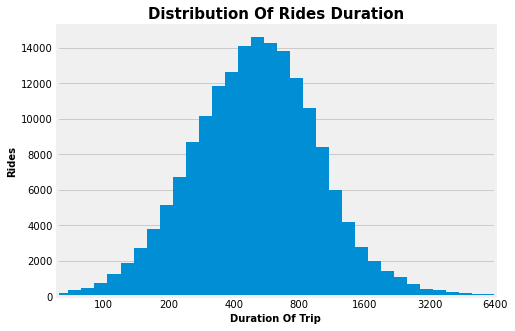

In [5]:
# log scale histogram 
binsize = 0.06
bins = 10 ** np.arange(1.78, 4.92+binsize, binsize)

plt.figure(figsize=[7, 5])
plt.hist(data = df, x = 'duration_sec', bins=bins)
plt.xscale('log')
plt.xticks([100, 200, 400, 800, 1600, 3200, 6400, 12800], [100, 200, 400, 800, 1600, 3200, 6400, 12800])
plt.title('Distribution of Rides Duration'.title(),
               fontsize = 15, weight = "bold")

plt.xlabel('Duration of trip'.title(),
               fontsize = 10, weight = "bold")
plt.ylabel('Rides'.title(),
               fontsize = 10, weight = "bold")
plt.xlim((61, 6400))
plt.grid(axis = 'x')

## Is Start time affect the duration of the trip?

> On average users may have longer trip when they start between 11 AM and 4 PM. 

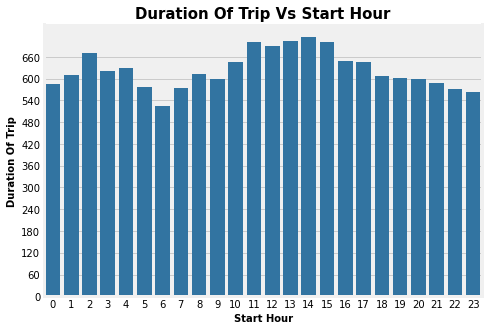

In [6]:
clear_df = df[delete_outliers(df.duration_sec)]

with plt.rc_context({'lines.linewidth': 1.5}):
    mean = clear_df.groupby('start_hour')['duration_sec'].mean()
    plt.subplots(figsize=(7, 5)) 
    plt.yticks(np.arange(0, 701, 60))
    sb.barplot(x = mean.index, y = mean, color = color)
    plt.title('Duration of Trip vs Start Hour'.title(),
               fontsize = 15, weight = "bold")

    plt.ylabel('Duration of trip'.title(),
               fontsize = 10, weight = "bold")
    plt.xlabel('Start Hour'.title(),
               fontsize = 10, weight = "bold")

## What is combination of user type and gender has the highest duration average ?

> Female customers have the highest average time trip and male subscribers have the lowest one.

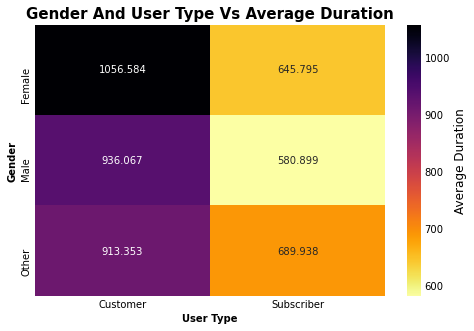

In [7]:
clean_df = df[delete_outliers(df.duration_sec)]

plt.figure(figsize=[7, 5])

means = clean_df.groupby(['user_type', 'member_gender'])['duration_sec'].mean()
means = means.reset_index(name = 'duration_sec')
means = means.pivot(index = 'member_gender', columns = 'user_type',
                            values = 'duration_sec')

sb.heatmap(means, annot = True, fmt = '.3f', cmap='inferno_r',
           cbar_kws = {'label' : 'Average Duration'});

plt.title('Gender and User Type vs Average Duration'.title(),
               fontsize = 15, weight = "bold")
plt.xlabel('User Type'.title(),
               fontsize = 10, weight = "bold");
plt.ylabel('Gender'.title(),
               fontsize = 10, weight = "bold");

## Is there a diffrence between genders in tearms of average duration and age ?

> Generally females using bike more thean males. Moreover, both Males and Females have stable duration trip time with slightly inceasing when they are between age 48 and 60. However, I think because of small sample of Others the line related to them is not that stable.


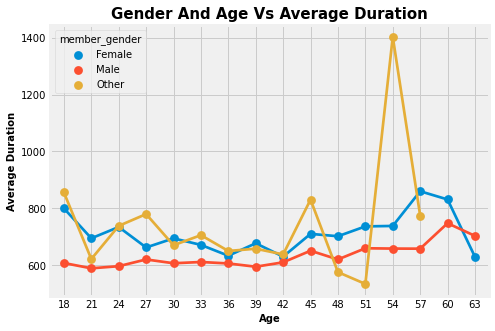

In [8]:
clean_df = df[delete_outliers(df[['duration_sec', 'age']])]

bin_edges = np.arange(clean_df.age.min(), clean_df.age.max() + 3, 3)
bin_centers = bin_edges[:-1] 
age_binned = pd.cut(clean_df.age, bin_edges, include_lowest = True)

means = clean_df.groupby(['member_gender', age_binned])['duration_sec'].mean().reset_index(name="duration")
means['age_centers'] = np.tile(bin_edges[:-1], 3)

with plt.rc_context({'lines.linewidth': 1.5}):
    plt.subplots(figsize = (7, 5)) 
    sb.pointplot(data = means, x = 'age_centers', y = 'duration', hue = 'member_gender');
    plt.grid(axis = 'x')
    plt.title('Gender and Age vs Average Duration'.title(),
               fontsize = 15, weight = "bold");
    plt.xlabel('Age'.title(),
               fontsize = 10, weight = "bold");
    plt.ylabel('Average Duration'.title(),
               fontsize = 10, weight = "bold");

##  Which gender is more likely to subscribe with our servecies ?

>  Male are more likely to subscribe with our servecies than females.


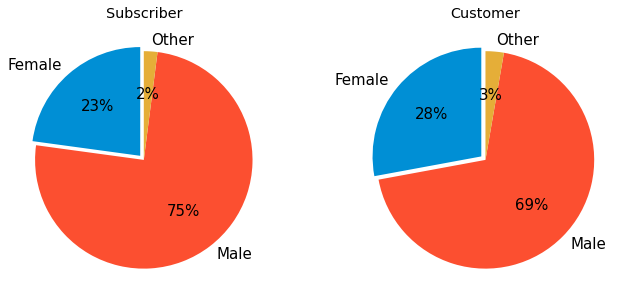

In [9]:
count_type_gender = df.groupby(['member_gender', 'user_type']).size().reset_index(name="count")

subscriber_gender = count_type_gender.query('user_type == "Subscriber"')
customer_gender = count_type_gender.query('user_type == "Customer"')

plt.subplots(figsize=(10, 5)) 

plt.subplot(1, 2, 1)
plt.title('Subscriber')
plt.pie(subscriber_gender['count'], explode = (0.05, 0, 0), labels = subscriber_gender.member_gender, autopct = '%1.0f%%',
        startangle=90, textprops={'fontsize': 15});

plt.subplot(1, 2, 2)
plt.title('Customer')

plt.pie(customer_gender['count'], explode = (0.05, 0, 0), labels = customer_gender.member_gender, autopct = '%1.0f%%',
         startangle=90, textprops={'fontsize': 15});

## Is there a diffrence between user type in tearms of average age and  starting hour ?

> There is no big different between customers and subscribers in terms of start time.

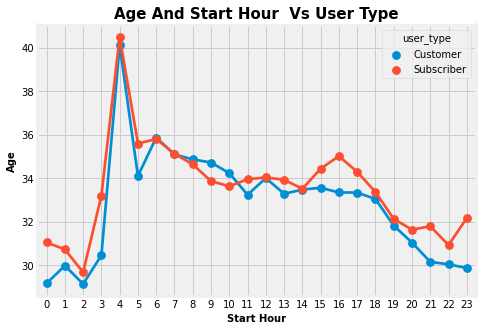

In [10]:
clean_df = df[delete_outliers(df.age)]

with plt.rc_context({'lines.linewidth': 1.5}):
    plt.subplots(figsize = (7, 5)) 
    age_hours_user = clean_df.groupby(['user_type','start_hour'])['age'].mean().reset_index(name="age")
    sb.pointplot(data = age_hours_user, x='start_hour', y='age', hue='user_type')
    plt.grid(axis='x');
    plt.title('Age and Start Hour  vs User Type'.title(),
               fontsize = 15, weight = "bold");
    plt.ylabel('Age'.title(),
               fontsize = 10, weight = "bold");
    plt.xlabel('Start Hour'.title(),
               fontsize = 10, weight = "bold");

In [11]:
!jupyter nbconvert Ford_GoBike_System_Data_Explanatory_Slide_Deck.ipynb --to slides --post serve --no-input -template output-toggle

Traceback (most recent call last):
  File "E:\anaconda3\lib\site-packages\traitlets\traitlets.py", line 535, in get
    value = obj._trait_values[self.name]
KeyError: 'template_paths'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "E:\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "E:\anaconda3\lib\site-packages\jupyter_core\application.py", line 270, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "E:\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "E:\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 350, in start
    self.convert_notebooks()
  File "E:\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 519, in convert_notebooks
    self.exporter = cls(config=self.config)
  File "E:\anaconda3\lib\site-packages\nbconvert\exporters\templat